In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Loading data

In [2]:
google_data=pd.read_csv('googleApp.csv')
google_data.head()
google_data.shape
google_data.describe()


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Data cleaning

In [3]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

cleaning a garbage value

In [4]:
google_data.drop([10472],inplace=True)

filling null value in this column

In [5]:
google_data.Rating=google_data.Rating.fillna(google_data.Rating.mean())

here data null values is filled by converting to str as data can be of any type and also mode can have more then 1 value hence we are choosing only first one

In [6]:
google_data.Type=google_data.Type.fillna(str(google_data.Type.mode().values[0]))

In [7]:
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]),inplace=True)

In [8]:
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]),inplace=True)

In [9]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
google_data['Reviews']=pd.to_numeric(google_data['Reviews'])

In [11]:
google_data['Installs']=google_data['Installs'].apply(lambda x: str(x).replace('+','')if '+' in str(x) else str(x)
                                            )

In [12]:
google_data['Installs']=google_data['Installs'].apply(lambda x: str(x).replace(',','')if ',' in str(x) else str(x))


In [13]:
google_data['Installs']=google_data['Installs'].apply(lambda x: float(x))


In [14]:
google_data['Installs'].head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

In [15]:
df=google_data.groupby('Category')


In [16]:
x=df['Rating'].agg(np.mean)

In [17]:
print(x)

Category
ART_AND_DESIGN         4.350389
AUTO_AND_VEHICLES      4.190601
BEAUTY                 4.260553
BOOKS_AND_REFERENCE    4.310663
BUSINESS               4.145448
COMICS                 4.156392
COMMUNICATION          4.163601
DATING                 4.007601
EDUCATION              4.387768
ENTERTAINMENT          4.126174
EVENTS                 4.363178
FAMILY                 4.192214
FINANCE                4.138922
FOOD_AND_DRINK         4.170485
GAME                   4.282441
HEALTH_AND_FITNESS     4.266092
HOUSE_AND_HOME         4.196603
LIBRARIES_AND_DEMO     4.181590
LIFESTYLE              4.112145
MAPS_AND_NAVIGATION    4.064911
MEDICAL                4.189781
NEWS_AND_MAGAZINES     4.142713
PARENTING              4.281960
PERSONALIZATION        4.307288
PHOTOGRAPHY            4.192094
PRODUCTIVITY           4.208015
SHOPPING               4.253918
SOCIAL                 4.247808
SPORTS                 4.218136
TOOLS                  4.066075
TRAVEL_AND_LOCAL       4.119520

In [18]:
google_data['Price']=google_data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))

In [19]:
google_data['Price']=google_data['Price'].apply(lambda x: float(x))

In [20]:
y=df['Price'].agg(np.mean)

In [21]:
z=df['Reviews'].agg(np.mean)

In [22]:
google_data['Reviews']=pd.to_numeric(google_data['Reviews'])

In [23]:
print(y)

Category
ART_AND_DESIGN         0.091846
AUTO_AND_VEHICLES      0.158471
BEAUTY                 0.000000
BOOKS_AND_REFERENCE    0.518485
BUSINESS               0.402761
COMICS                 0.000000
COMMUNICATION          0.214832
DATING                 0.134316
EDUCATION              0.115128
ENTERTAINMENT          0.053557
EVENTS                 1.718594
FAMILY                 1.234675
FINANCE                7.925765
FOOD_AND_DRINK         0.066772
GAME                   0.251136
HEALTH_AND_FITNESS     0.197478
HOUSE_AND_HOME         0.000000
LIBRARIES_AND_DEMO     0.011647
LIFESTYLE              6.180288
MAPS_AND_NAVIGATION    0.196715
MEDICAL                3.110065
NEWS_AND_MAGAZINES     0.014064
PARENTING              0.159667
PERSONALIZATION        0.392755
PHOTOGRAPHY            0.400627
PRODUCTIVITY           0.591816
SHOPPING               0.021077
SOCIAL                 0.054136
SPORTS                 0.260417
TOOLS                  0.317023
TRAVEL_AND_LOCAL       0.193605

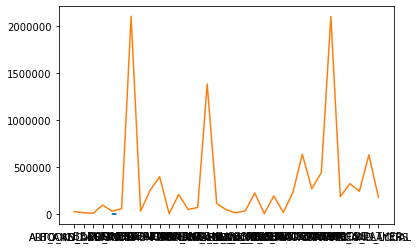

In [25]:
plt.plot(x,y,z)